<a href="https://colab.research.google.com/github/tombro27/SuperStore_EDA/blob/main/Superstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uploading Required Libraries

In [1]:
import io
from google.colab import files

import pandas as pd   
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [2]:
uploaded = files.upload()

df = pd.read_csv(io.BytesIO(uploaded['SampleSuperstore.csv']))

df.head()

Saving SampleSuperstore.csv to SampleSuperstore.csv


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Exploring Data

In [3]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

Counting Unique Values

In [4]:
for i in df.select_dtypes(include=[object]):
  print(i,end=" : ")
  print(df[i].nunique())

Ship Mode : 4
Segment : 3
Country : 1
City : 531
State : 49
Region : 4
Category : 3
Sub-Category : 17


In [5]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

*We can drop Country column as it has a single unique value*

In [6]:
df.drop('Country',axis=1,inplace=True)

### Sales wrt Categories 

In [7]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


<Figure size 936x576 with 0 Axes>

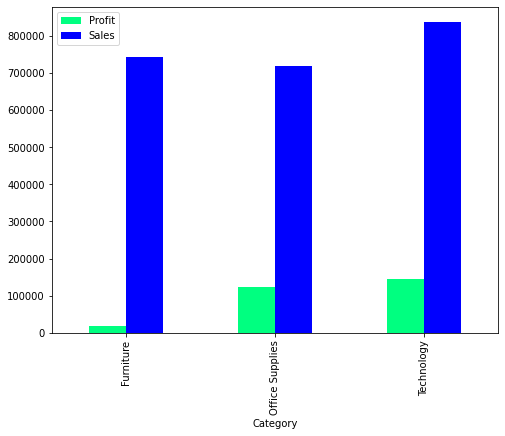

In [8]:
plt.figure(figsize = (13,8))
df.groupby('Category')['Profit','Sales'].agg('sum').plot.bar(colormap='winter_r', figsize=(8,6))
plt.show()

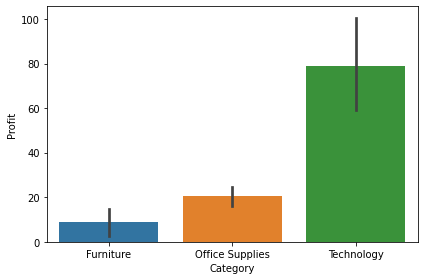

In [9]:
fig=sns.barplot(x=df['Category'], y=df['Profit'])
plt.tight_layout()
plt.show()

It is clear that despite having similar sales with other categories, the products under category *Technology* got maximum profit.


So we need to work on the *Furniture* and *Office Supplies* Category.

### Now look at the *Sub-Categories*

In [10]:
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

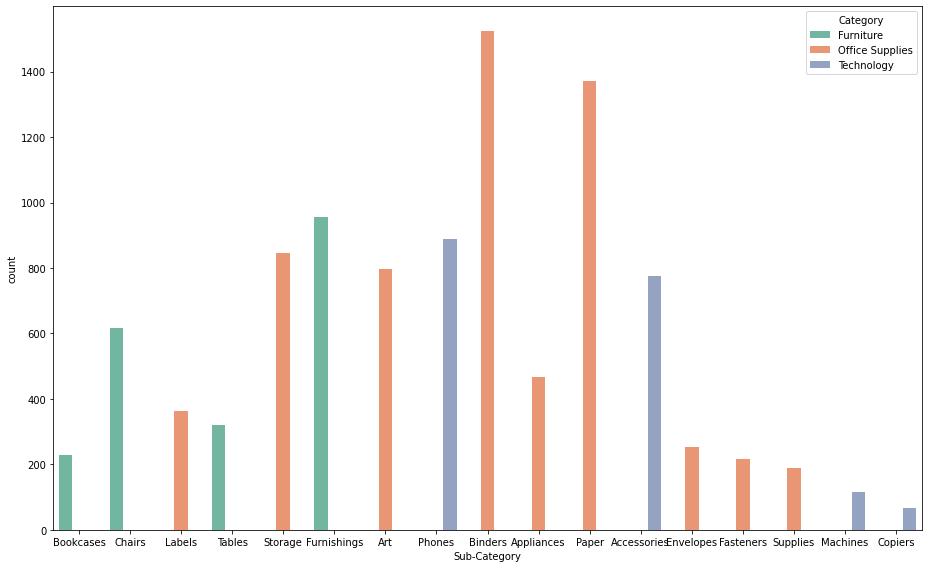

In [11]:
plt.figure(figsize = (13,8))
fig=sns.countplot(x='Sub-Category', data=df, hue='Category', palette='Set2')
plt.tight_layout()
plt.show()

Here, we have total 17 sub-categories. Out of these 17 categories, 4 fall under Furninture category, 9 under Office Supplies and rest 4 under Technology.

**Profit and Sales wrt to Sub-Categories**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


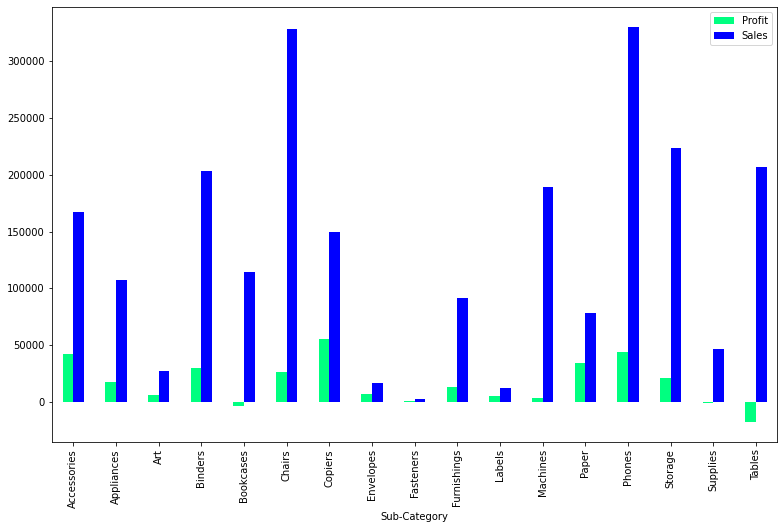

In [12]:
df.groupby(['Sub-Category'])['Profit','Sales'].agg('sum').plot(kind='bar', colormap='winter_r', figsize=(13,8))

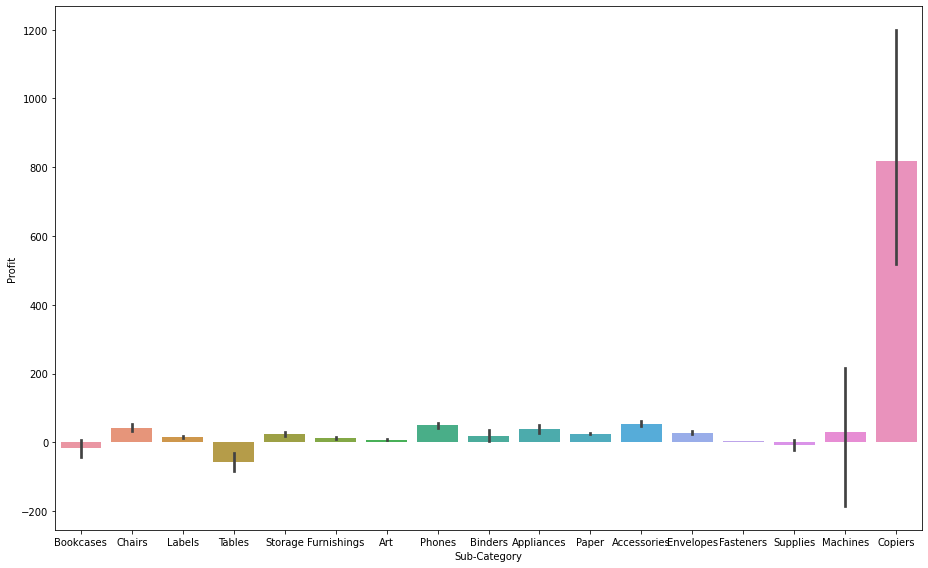

In [13]:
plt.figure(figsize = (13,8))
fig=sns.barplot(x=df['Sub-Category'], y=df['Profit'])
plt.tight_layout()
plt.show()

The *Copiers* sub-category has been the most profitable.
*Bookcases*, *Tables* and *Supplies* need more attention as they are doing damage.

### Discount VS Profit

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


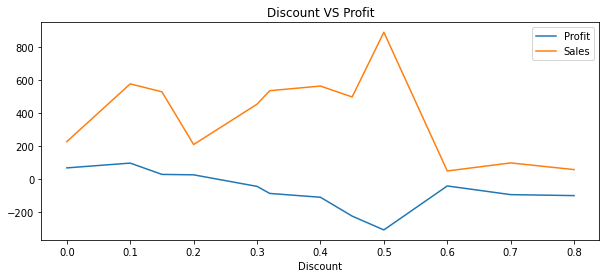

In [14]:
df.groupby(['Discount'])['Profit','Sales'].agg('mean').plot(kind='line',legend=True, figsize=(10,4))
plt.title("Discount VS Profit")
plt.show()

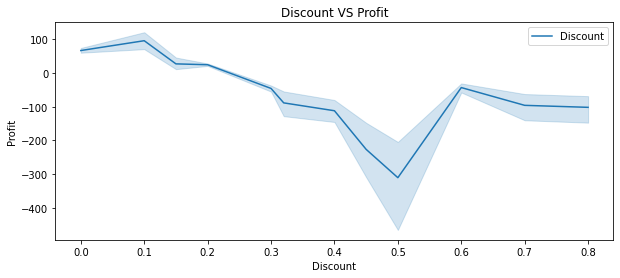

In [15]:
plt.figure(figsize = (10,4))
sns.lineplot(x='Discount', y='Profit', data = df, label = "Discount")
plt.title("Discount VS Profit")
plt.show()

We can see that despite having maximum sales with 50% discount, we incur maximum loss. 

### Sales wrt Ship Mode

In [16]:
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


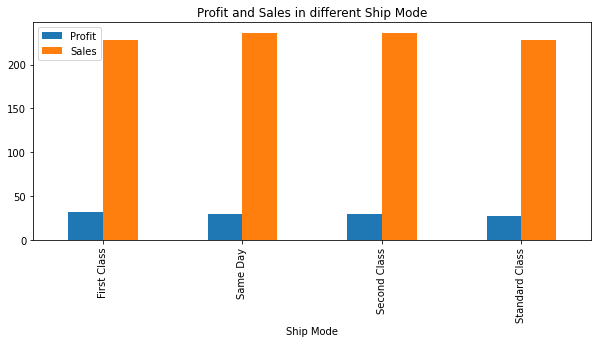

In [17]:
df.groupby(['Ship Mode'])['Profit','Sales'].agg('mean').plot(kind='bar',legend=True, figsize=(10,4))
plt.title("Profit and Sales in different Ship Mode")
plt.show()

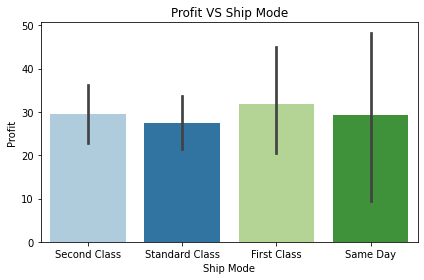

In [18]:
fig=sns.barplot(x=df['Ship Mode'], y=df['Profit'], palette='Paired')
plt.title("Profit VS Ship Mode")
plt.tight_layout()
plt.show()

We have similar sales and profit in all shipping mode. Hence not much work required in this section.

### Segment-wise Profits

In [19]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

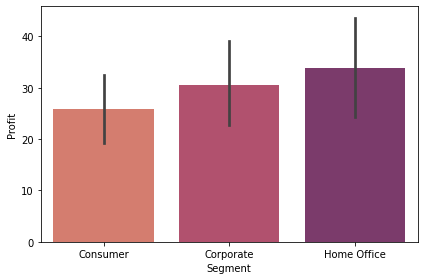

In [20]:
fig=sns.barplot(x=df['Segment'], y=df['Profit'], palette='flare')
plt.tight_layout()
plt.show()

We have least profit in *Consumer* segment. We can work int this segment to improve further.

### Region-wise Sales and Profit

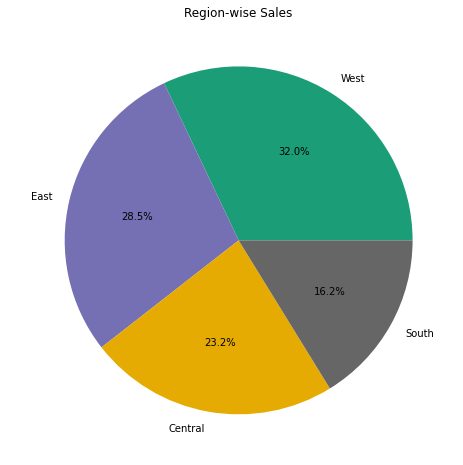

In [21]:
plt.figure(figsize=(8,8))
df['Region'].value_counts().plot.pie(autopct="%1.1f%%", colormap="Dark2")
plt.ylabel(" ")
plt.title("Region-wise Sales")
plt.show()

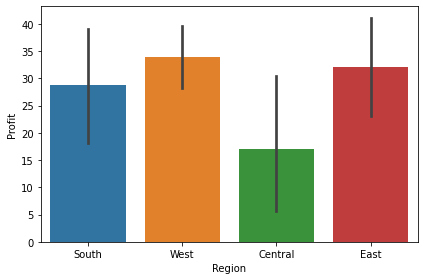

In [22]:
plt.figure(figsize = (6,4))
fig=sns.barplot(x=df['Region'], y=df['Profit'])
plt.tight_layout()
plt.show()

*Central* is the least profitable area despite being a quarter of sales. Need to work in the *Central* Region.

### State-wise Sales and Profit

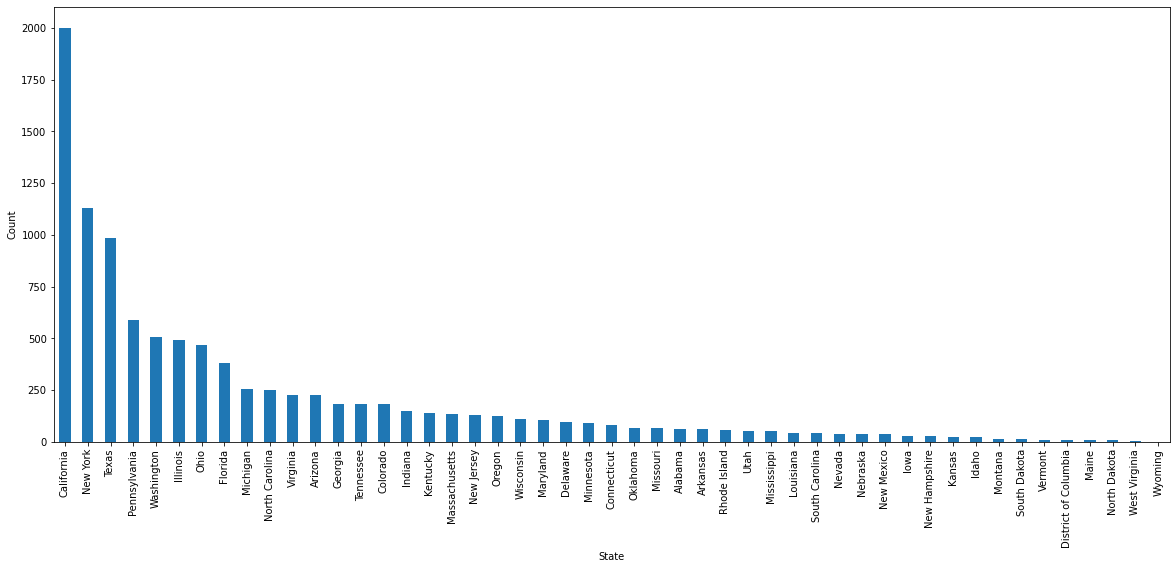

In [23]:
plt.figure(figsize=(20,8))
df['State'].value_counts().plot.bar(xlabel="State", ylabel="Count")
plt.show()

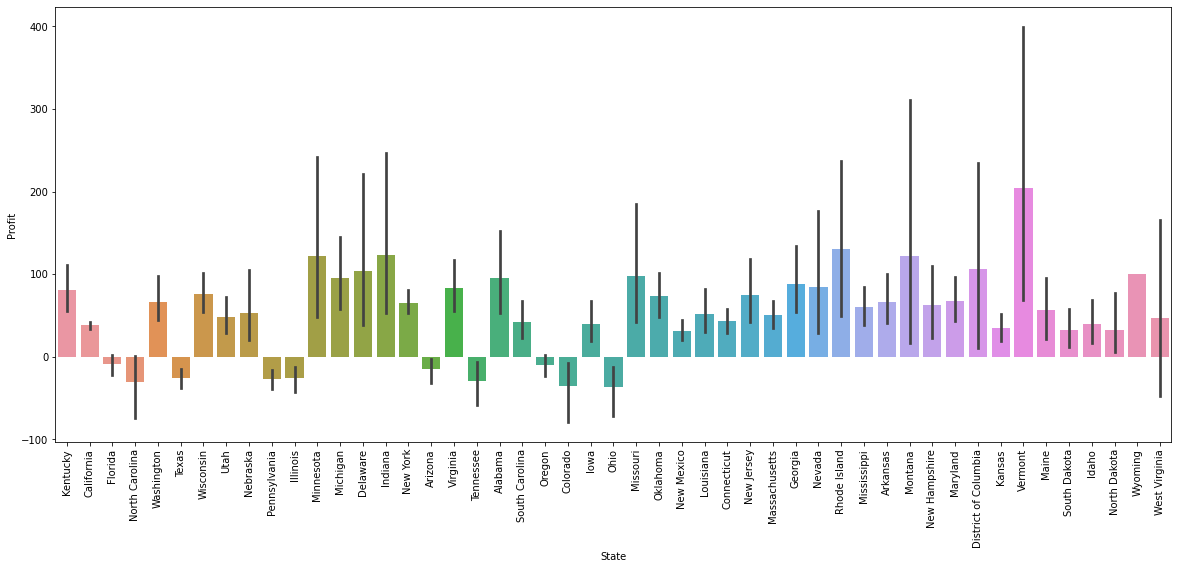

In [24]:
plt.figure(figsize = (20,8))
fig=sns.barplot(x=df['State'], y=df['Profit'])
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

Here we notice that, *Florida, North Carolina, Texas, Pennsylvania, Illinois, Arizona, Tennessee, Oregon, Colorado* and *Ohio* are the loss making states. We need to pay more attention in these states.

### Quantity VS Profit

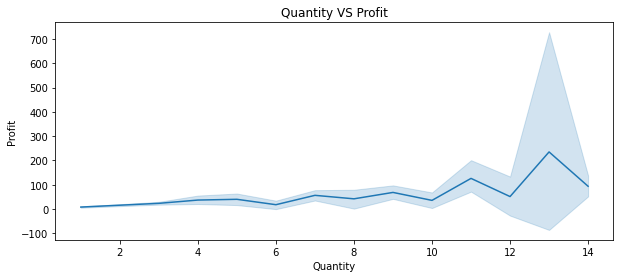

In [31]:
plt.figure(figsize = (10,4))
sns.lineplot(x='Quantity', y='Profit', data = df)
plt.title("Quantity VS Profit")
plt.show()

From the above graph we can say that on an average increasing the quantity will bring profit.

## Correlation matrix and Heatmap

In [25]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


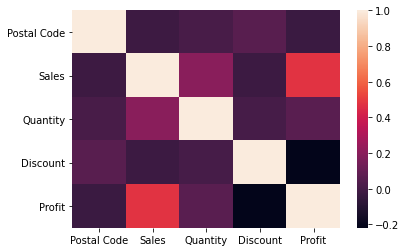

In [26]:
sns.heatmap(data=df.corr())

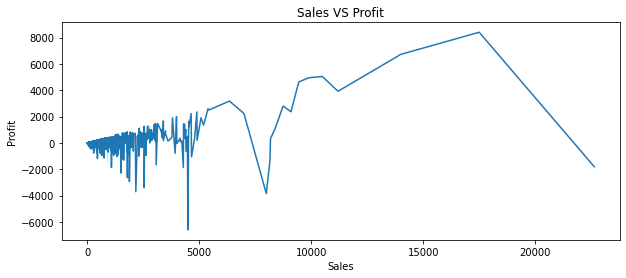

In [32]:
plt.figure(figsize = (10,4))
sns.lineplot(x='Sales', y='Profit', data = df)
plt.title("Sales VS Profit")
plt.show()